# TP n°1 des modules RT2R05 et R2R06 
 Jalain Enzo & Treard Louis (RT1 FI A2 - 2024)
 


## 1. Analyse de signaux périodiques 

### De la transformé de Fourier à la FFT

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


$$x(t) = 1.\cos(2\pi . 1000 . t)
$$

**7. Préciser l'amplitude du signal :**
_L'amplitude du signal est 1_ $$\color{red}1 \color{reset} .\cos(2\pi . 1000 . t) $$

**8. Modéliser ce signal qu'on appellera y(t) comme le produit d'une porte et d'un cosinus** : $$ y(t) = \Pi_{T_0} . x(t) $$

**9. En déduire la transformé de fourier du signal :**  $$ Y(f) = T_0 . sinc(\pi . f . T_0)\ \ \  * \ \ \  \frac{1}{2} [\delta (f+f_0) + \delta (f-f_0) ] $$

$$ Y(f) = T_0 . sinc(f + 1000) + T_0 . sinc(f - 1000)$$

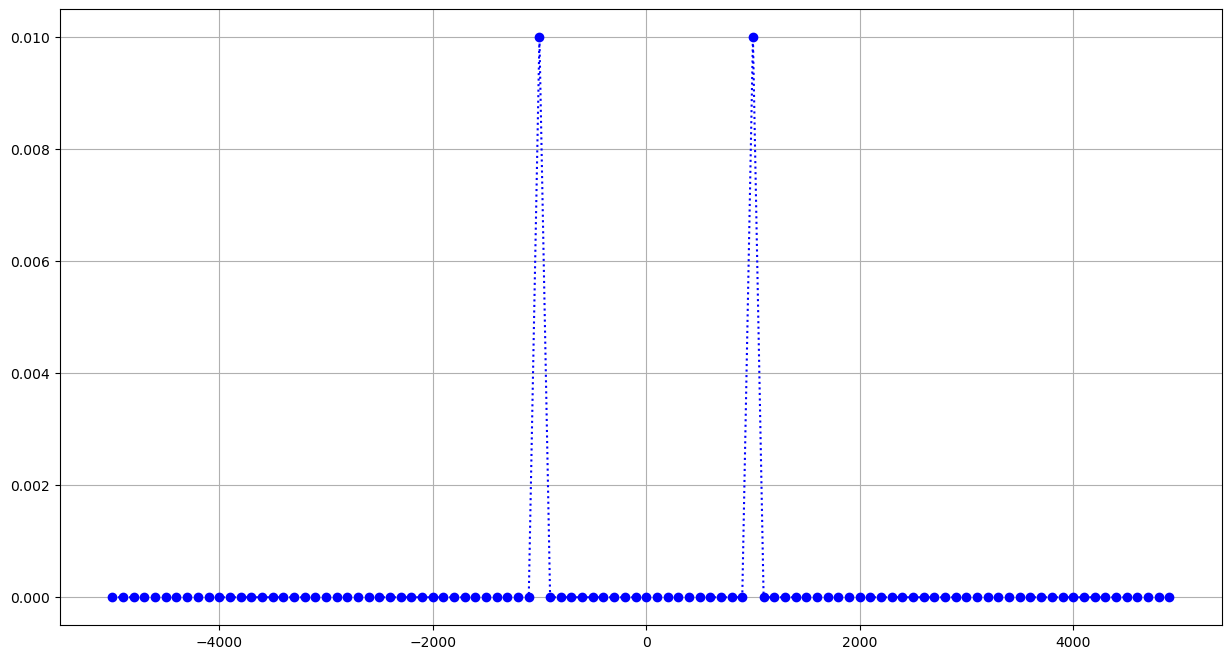

In [33]:
centre = 5
largeur = 10
frequence= np.arange(-5000, 5000, 100)
T0 = 10e-3
y = T0*np.sinc(frequence+1000) + T0*np.sinc(frequence-1000)


fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(frequence, y, 'b:o')
ax.grid()


In [35]:
temps = np.arange(-5e-3, 5e-3, 1e-4)

signal = np.sin(2*np.pi*temps)
N = len(signal)
new_fft_signal = 1/N*np.fft.fftshift(np.fft.fft(signal))

14. 